# Backward Elimination Algorithm for Feature Selection

**Backward Elimination** is a classic **wrapper** method used for feature selection in machine learning. The main idea is to start with all available features and iteratively remove the least significant feature at each step until the optimal subset of features is obtained.

## How Backward Elimination Works:

1. **Start with all features** in the dataset.
2. **Train the model** (e.g., Naïve Bayes classifier) using the current set of features.
3. **Evaluate the model's performance** using a chosen metric (such as accuracy).
4. **Identify the least significant feature** (usually the one whose removal improves or least degrades performance).
5. **Remove that feature** from the feature set.
6. **Repeat steps 2-5** until removing more features does not improve the model or a stopping criterion is met (e.g., a predefined number of features or performance threshold).

## Advantages:
- Considers feature interactions because it evaluates subsets with the actual classifier.
- Often leads to a smaller, more relevant feature set.

## Disadvantages:
- Computationally expensive because it requires training the model multiple times.
- Can get stuck in local optima.

In this project, we will implement **Backward Elimination** manually (without using any ready-made libraries) to select features on the TinyMNIST dataset. For classification, we will use the Naïve Bayes optimal classifier from existing packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
train_data = np.loadtxt('/mnt/e/Term 3/Machin-Learning/Projects/07 pro/data/trainData.csv', delimiter=',', dtype=np.float32)
train_labels = np.loadtxt('/mnt/e/Term 3/Machin-Learning/Projects/07 pro/data/trainLabels.csv', delimiter=',', dtype=np.float32)
test_data = np.loadtxt('/mnt/e/Term 3/Machin-Learning/Projects/07 pro/data/testData.csv', delimiter=',', dtype=np.float32)
test_labels = np.loadtxt('/mnt/e/Term 3/Machin-Learning/Projects/07 pro/data/testLabels.csv', delimiter=',', dtype=np.float32)

print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of features: {train_data.shape[1]}')

Number of training samples: 5000
Number of features: 196


### 🔍 Variance Threshold Feature Selection

In this section, we apply **feature selection** using the `VarianceThreshold` method from `sklearn.feature_selection`.

The idea is to remove features (columns) that have very low variance, as they provide little to no information for classification.

#### Steps:
1. **Concatenate** the training and test data vertically using `np.vstack()` to ensure that feature selection is performed globally across the entire dataset.
2. **Apply VarianceThreshold** with a threshold of `0.09` (which is `0.90 * (1 - 0.90)`). This means:
   - Any feature with variance **less than 0.09** will be removed.
   - This threshold assumes binary data, where maximum variance is `0.25` (for 50-50 split), so 0.09 is a reasonable cutoff.
3. **Transform** the combined data using the fitted selector, which returns only the selected features.
4. **Split** the filtered data back into training and testing sets.

This helps in reducing dimensionality and keeping only the most informative features for classification.



In [3]:
all_data = np.vstack((train_data, test_data))
var_selctor = VarianceThreshold(threshold=0.09)
all_data = var_selctor.fit_transform(X=all_data)

train_data_with_sel = all_data[:train_data.shape[0]]
test_data_with_sel = all_data[train_data.shape[0]:]

tr_samples_size, feature_size = train_data_with_sel.shape
te_samples_size, _ = test_data_with_sel.shape

print('Train Data Samples:',tr_samples_size,
      ', Test Data Samples',te_samples_size,
      ', Feature Size(after feature-selection):', feature_size)

Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 62


In [4]:
def backward_elimination(train_data, train_labels, test_data, test_labels):
    selected_features = list(range(train_data.shape[1]))
    accuracies = []
    num_features = []
    model = GaussianNB()
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    acc = accuracy_score(y_true=test_labels, y_pred=predictions)
    num_features.append(train_data.shape[1])
    best_accuracy = acc
    accuracies.append(acc)

    while len(selected_features) > 1:
        feature_to_remove = None
        
        for feature in selected_features:
            candidate_features = [f for f in selected_features if f != feature]
            model = GaussianNB()
            model.fit(train_data[:, candidate_features], train_labels)
            predictions = model.predict(test_data[:, candidate_features])
            acc = accuracy_score(test_labels, predictions)

            if acc >= best_accuracy:
                best_accuracy = acc
                feature_to_remove = feature

        if feature_to_remove is not None:
            selected_features.remove(feature_to_remove)
            accuracies.append(best_accuracy)
            num_features.append(len(selected_features))
            print(f"Removed feature: {feature_to_remove}, Accuracy: {best_accuracy:.4f}")
        else:
            break

    return selected_features, num_features, accuracies

# Forward Selection Algorithm for Feature Selection

**Forward Selection** is a simple and intuitive **wrapper** method for feature selection. Unlike Backward Elimination, it starts with an empty set of features and iteratively adds the most significant features one by one until the best subset is found.

## How Forward Selection Works:

1. **Start with an empty feature set.**
2. For each feature not yet selected, **train the model** (e.g., Naïve Bayes classifier) using the current selected features plus this candidate feature.
3. **Evaluate the model's performance** using a chosen metric (such as accuracy).
4. **Select the feature** that improves the model's performance the most.
5. **Add this feature** to the selected feature set.
6. **Repeat steps 2-5** until adding more features does not improve performance or a stopping criterion is met (e.g., maximum number of features).

## Advantages:
- Simple and efficient when the number of features is large.
- Builds up the model incrementally, which can be easier to interpret.

## Disadvantages:
- May miss interactions between features since it only adds one feature at a time.
- Still computationally expensive for very large feature sets.

In this project, we will implement **Forward Selection** manually (without using any ready-made libraries) on the TinyMNIST dataset. For classification, we will use the Naïve Bayes optimal classifier from existing packages.


In [5]:
def forward_selection(train_data, train_labels, test_data, test_labels):
    selected_features = []
    remaining_features = list(range(train_data.shape[1]))
    best_accuracy = 0
    accuracies = []
    
    while remaining_features:
        feature_to_add = None

        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            model = GaussianNB()
            model.fit(train_data[:, candidate_features], train_labels)
            predictions = model.predict(test_data[:, candidate_features])
            acc = accuracy_score(test_labels, predictions)

            if acc > best_accuracy:
                best_accuracy = acc
                feature_to_add = feature

        if feature_to_add is not None:
            selected_features.append(feature_to_add)
            remaining_features.remove(feature_to_add)
            accuracies.append(best_accuracy)
        else:
            break

    return selected_features, accuracies


Forward Selection - Selected Features: 29, Best Accuracy: 0.7888


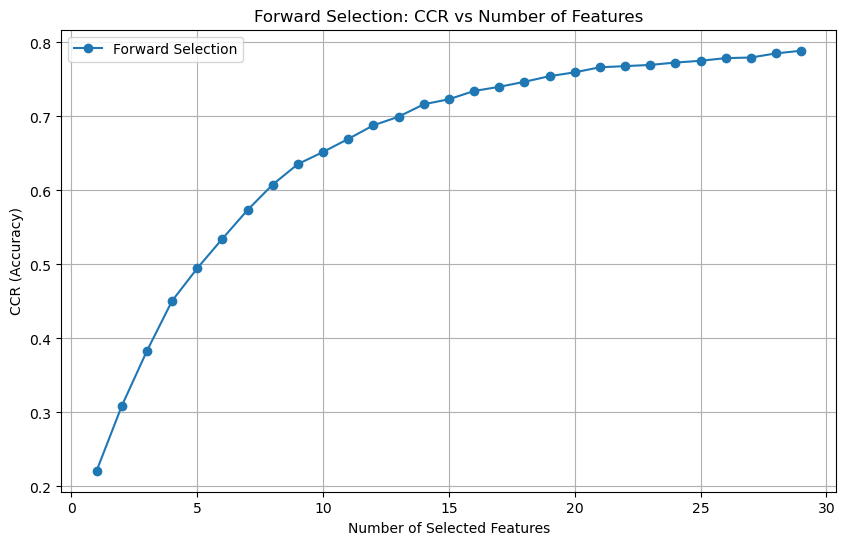

In [6]:
selected_forward, forward_accuracies = forward_selection(train_data_with_sel, train_labels, test_data_with_sel, test_labels)
best_accuracy_forward = max(forward_accuracies)
print(f"Forward Selection - Selected Features: {len(selected_forward)}, Best Accuracy: {best_accuracy_forward}")

# Plot Forward Selection CCR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_accuracies) + 1), forward_accuracies, marker='o', label='Forward Selection')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR (Accuracy)')
plt.title('Forward Selection: CCR vs Number of Features')
plt.legend()
plt.grid()
plt.show()

Removed feature: 43, Accuracy: 0.7728
Removed feature: 36, Accuracy: 0.7804
Removed feature: 59, Accuracy: 0.7852
Removed feature: 44, Accuracy: 0.7872
Removed feature: 35, Accuracy: 0.7900
Removed feature: 22, Accuracy: 0.7912
Removed feature: 4, Accuracy: 0.7956
Removed feature: 48, Accuracy: 0.7956
Backward Elimination - Selected Features: 54, Best Accuracy: 0.7956


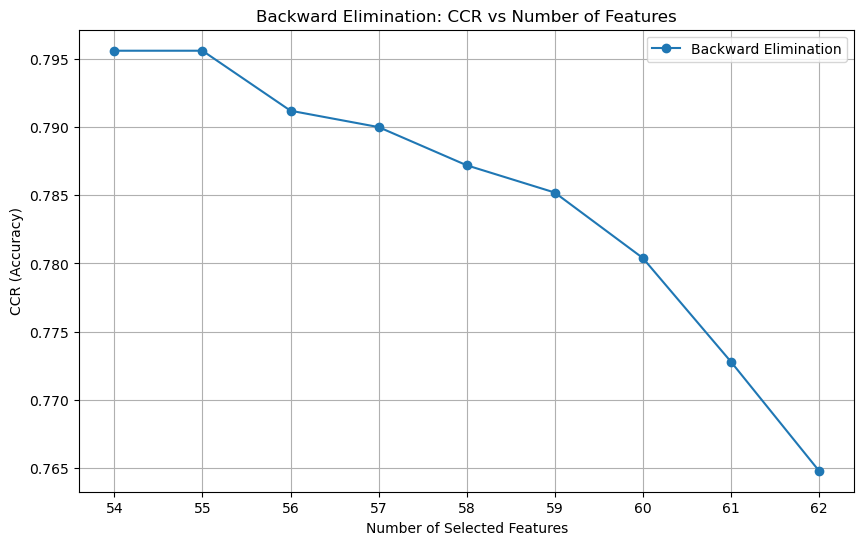

In [7]:
selected_backward, num_features, backward_accuracies = backward_elimination(train_data_with_sel, train_labels, test_data_with_sel, test_labels)
best_accuracy_backward = max(backward_accuracies)
print(f"Backward Elimination - Selected Features: {num_features[-1]}, Best Accuracy: {best_accuracy_backward}")

# Plot Backward Elimination CCR
plt.figure(figsize=(10, 6))
plt.plot(num_features, backward_accuracies, marker='o', label='Backward Elimination')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR (Accuracy)')
plt.title('Backward Elimination: CCR vs Number of Features')
plt.legend()
plt.grid()
plt.show()

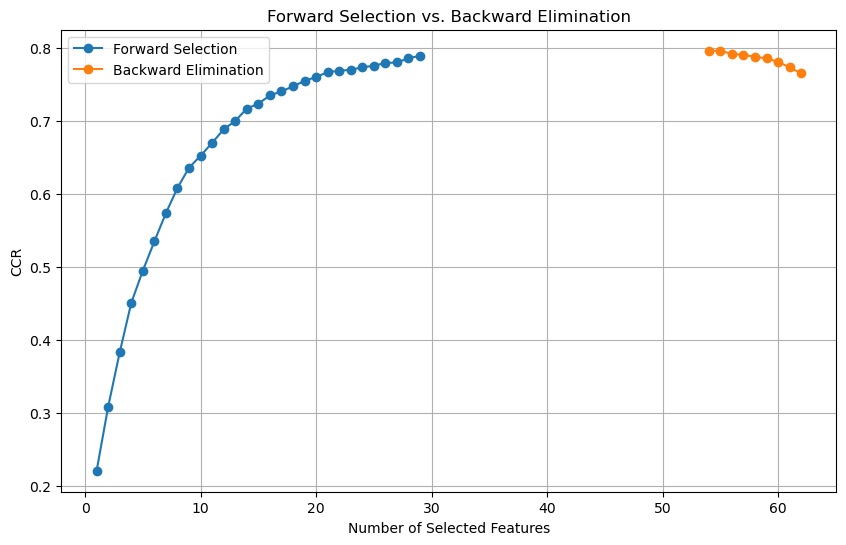

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_accuracies) + 1), forward_accuracies, marker='o', label='Forward Selection')
plt.plot(num_features, backward_accuracies, marker='o', label='Backward Elimination')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR')
plt.title('Forward Selection vs. Backward Elimination')
plt.legend()
plt.grid()
plt.show()

/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by 

Forward Selection - Selected Features: 29, Best Accuracy: 0.7888


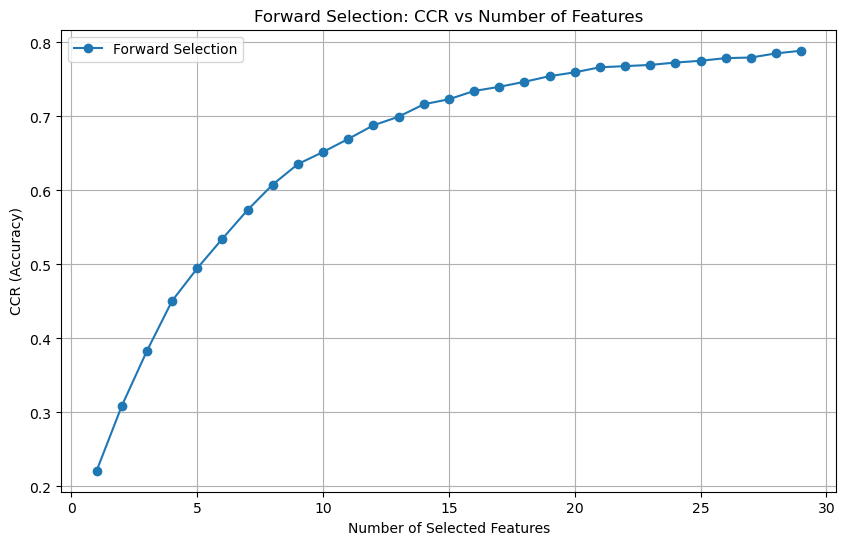

In [9]:
selected_forward, forward_accuracies = forward_selection(train_data, train_labels, test_data, test_labels)
best_accuracy_forward = max(forward_accuracies)
print(f"Forward Selection - Selected Features: {len(selected_forward)}, Best Accuracy: {best_accuracy_forward}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_accuracies) + 1), forward_accuracies, marker='o', label='Forward Selection')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR (Accuracy)')
plt.title('Forward Selection: CCR vs Number of Features')
plt.legend()
plt.grid()
plt.show()

Removed feature: 30, Accuracy: 0.5216
Removed feature: 57, Accuracy: 0.5324
Removed feature: 127, Accuracy: 0.5404
Removed feature: 184, Accuracy: 0.5500
Removed feature: 113, Accuracy: 0.5632
Removed feature: 20, Accuracy: 0.5776
Removed feature: 169, Accuracy: 0.5904
Removed feature: 56, Accuracy: 0.6044
Removed feature: 43, Accuracy: 0.6144
Removed feature: 21, Accuracy: 0.6248
Removed feature: 139, Accuracy: 0.6288
Removed feature: 39, Accuracy: 0.6324
Removed feature: 29, Accuracy: 0.6368
Removed feature: 54, Accuracy: 0.6452
Removed feature: 141, Accuracy: 0.6496
Removed feature: 155, Accuracy: 0.6532
Removed feature: 16, Accuracy: 0.6568
Removed feature: 96, Accuracy: 0.6600
Removed feature: 4, Accuracy: 0.6628
Removed feature: 153, Accuracy: 0.6656
Removed feature: 157, Accuracy: 0.6680
Removed feature: 17, Accuracy: 0.6700
Removed feature: 99, Accuracy: 0.6724
Removed feature: 83, Accuracy: 0.6748
Removed feature: 8, Accuracy: 0.6776
Removed feature: 72, Accuracy: 0.6800
Remov

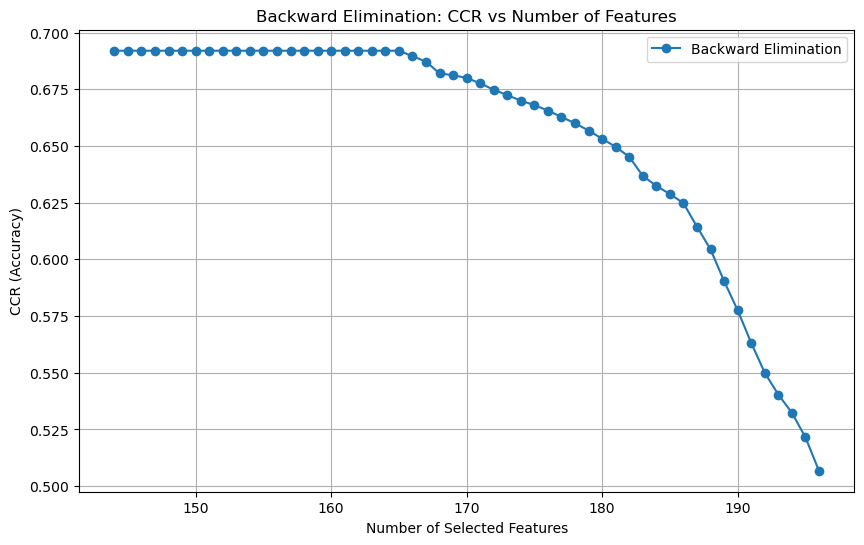

In [10]:
selected_backward, num_features, backward_accuracies = backward_elimination(train_data, train_labels, test_data, test_labels)
best_accuracy_backward = max(backward_accuracies)
print(f"Backward Elimination - Selected Features: {num_features[-1]}, Best Accuracy: {best_accuracy_backward}")

plt.figure(figsize=(10, 6))
plt.plot(num_features, backward_accuracies, marker='o', label='Backward Elimination')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR (Accuracy)')
plt.title('Backward Elimination: CCR vs Number of Features')
plt.legend()
plt.grid()
plt.show()

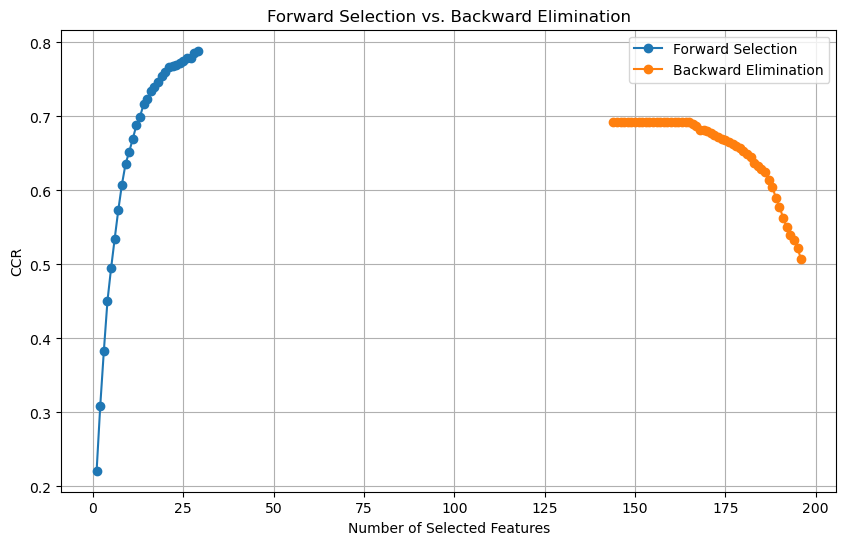

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(forward_accuracies) + 1), forward_accuracies, marker='o', label='Forward Selection')
plt.plot(num_features, backward_accuracies, marker='o', label='Backward Elimination')
plt.xlabel('Number of Selected Features')
plt.ylabel('CCR')
plt.title('Forward Selection vs. Backward Elimination')
plt.legend()
plt.grid()

___

___

___

# 📊 Principal Component Analysis (PCA)

## Overview

**Principal Component Analysis (PCA)** is a popular technique for **dimensionality reduction**, which transforms high-dimensional data into a lower-dimensional space while preserving as much variance (information) as possible.


## 🔍 Main Goals of PCA

- Reduce the dimensionality of data  
- Eliminate correlation between features  
- Preserve the directions of **maximum variance**  
- Enable visualization of high-dimensional data  



## 🧠 Intuition Behind PCA

Given a dataset with $d$ features, PCA finds a set of **orthogonal directions (principal components)** along which the **variance** of the projected data is maximized. The first principal component captures the most variance, the second captures the most variance orthogonal to the first, and so on.



## 📋 Step-by-Step Procedure

1. **Center the data** (subtract the mean of each feature)  
2. **Compute the covariance matrix**  
3. **Compute eigenvectors and eigenvalues** of the covariance matrix  
4. **Sort eigenvectors** by decreasing eigenvalues  
5. **Project the data** onto the top $k$ eigenvectors (principal components)  



## 🧮 Optimization Formulation of PCA

### Problem Statement

Let $X \in \mathbb{R}^{n \times d}$ be a zero-mean data matrix (centered), where $n$ is the number of samples and $d$ is the number of features.

We want to find a direction (unit vector) $w \in \mathbb{R}^d$ such that the **variance of the projected data** $Xw$ is maximized:

$$
\max_{w \in \mathbb{R}^d, \ \|w\| = 1} \ \text{Var}(Xw)
$$



### Step 1: Express Variance in Terms of $w$

Since $X$ is centered:

$$
\text{Var}(Xw) = \frac{1}{n} \|Xw\|^2 = w^\top \left( \frac{1}{n} X^\top X \right) w = w^\top C w
$$

Where $C$ is the **covariance matrix**:

$$
C = \frac{1}{n} X^\top X
$$



### Step 2: Optimization with a Constraint

We want to solve:

$$
\max_{w} \quad w^\top C w \quad \text{subject to} \quad \|w\|^2 = 1
$$

This is a constrained optimization problem, which we solve using **Lagrange multipliers**.



### Step 3: Lagrangian Function

We define the Lagrangian:

$$
\mathcal{L}(w, \lambda) = w^\top C w - \lambda (w^\top w - 1)
$$

Take the gradient with respect to $w$ and set it to zero:

$$
\nabla_w \mathcal{L} = 2Cw - 2\lambda w = 0 \Rightarrow Cw = \lambda w
$$

This is the **eigenvalue equation**: $w$ must be an eigenvector of $C$, and $\lambda$ is the corresponding eigenvalue.



### 🔚 Result

- The optimal $w$ is the **eigenvector of $C$** with the **largest eigenvalue**  
- The second principal component is the eigenvector with the second largest eigenvalue, orthogonal to the first, and so on  



## ✅ Final Summary

| Step | Description |
|------|-------------|
| 1 | Center the data: $X \leftarrow X - \bar{X}$ |
| 2 | Compute covariance matrix: $C = \frac{1}{n} X^\top X$ |
| 3 | Compute eigenvectors and eigenvalues of $C$ |
| 4 | Sort eigenvectors by descending eigenvalues |
| 5 | Choose top $k$ eigenvectors and project: $X_{\text{new}} = X W_k$ |



## 📌 Key Notes

- Eigenvectors define the **directions** of maximum variance  
- Eigenvalues tell how much **variance** is captured by each direction  
- PCA assumes **linear relationships** and works best when features are correlated  


In [13]:
num_samples, num_features = train_data.shape
print(f'Number of training samples: {num_samples} and Number of features: {num_features}')

Number of training samples: 5000 and Number of features: 196


In [15]:
def pca(train_data, n_components):
    mean_train = np.mean(train_data, axis=0)
    centered_train_data = train_data - mean_train

    n_samples = train_data.shape[0]
    covariance_matrix = (centered_train_data.T @ centered_train_data) / (n_samples - 1)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]

    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    return mean_train, sorted_eigenvalues, selected_eigenvectors

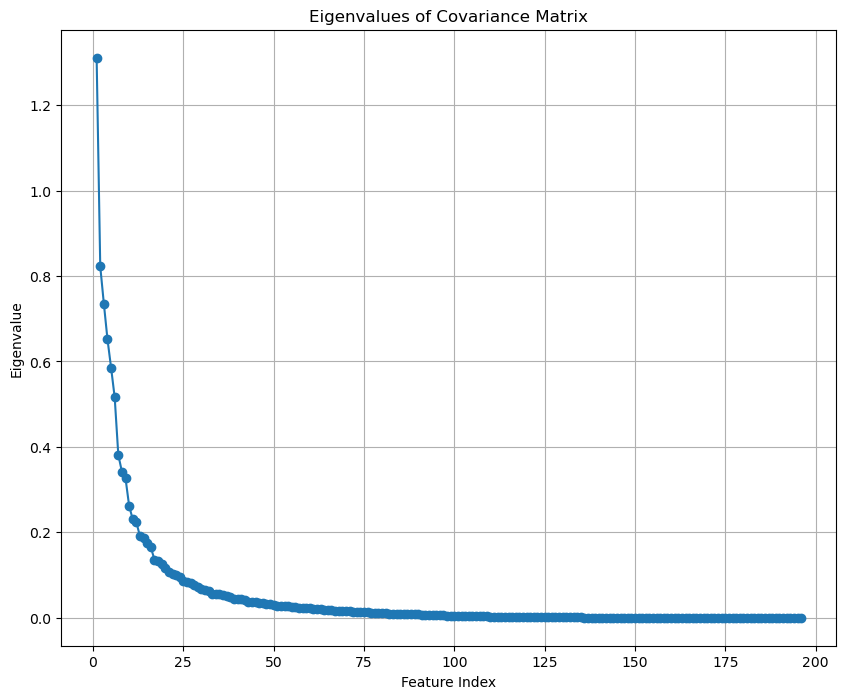

In [23]:
mean_training_data, eigenvalues, eigenvectors = pca(train_data=train_data, n_components=train_data.shape[0])

# plot all eigenvalues
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Feature Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Covariance Matrix')
plt.grid()
plt.show()

## ✅ Methods for Determining the Optimal Number of Components in PCA

### 🎯 1. Explained Variance Ratio

In PCA, each **eigenvalue** represents the **amount of variance** captured by its corresponding **principal component**. To choose the optimal number of components, we evaluate how much total variance is preserved by the top $k$ components.



### 📌 Steps:

#### ➤ Total variance:

The total variance in the dataset is the sum of all eigenvalues:

$$
\text{Total Variance} = \sum_i \lambda_i
$$



#### ➤ Explained variance ratio for each component:

This shows the proportion of total variance captured by each component:

$$
\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_j \lambda_j}
$$



#### ➤ Cumulative explained variance:

This shows how much total variance is retained by the first $k$ components:

$$
\text{Cumulative Variance}_k = \sum_{i=1}^{k} \text{Explained Variance Ratio}_i
$$



### 📈 Common Practice:

- Select the smallest $k$ such that:
  
  $$
  \text{Cumulative Variance}_k \geq 0.95
  $$

- This means at least 95% of the original information (variance) is preserved.



In [30]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)
optimal_feature_number = np.argmax(cumulative_variance >= 0.95) + 1

print(f'Optimal feature number: {optimal_feature}')

Optimal feature number: 62


In [31]:
def plot_explained_variance(cumulative_variance):
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.title('Explained Variance vs Number of Components')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
    plt.legend()
    plt.show()

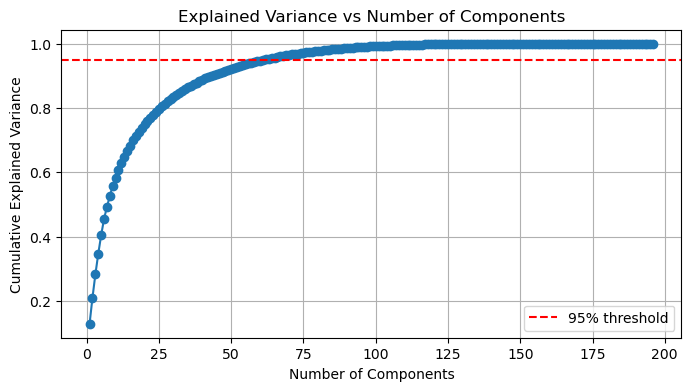

In [28]:
plot_explained_variance(cumulative_variance)

In [32]:
train_data_reduced = np.dot(train_data - mean_training_data, eigenvectors[:, :optimal_feature_number])
test_data_reduced = np.dot(test_data - mean_training_data, eigenvectors[:, :optimal_feature_number])

In [34]:
model = GaussianNB()
model.fit(train_data_reduced, train_labels)
predictions = model.predict(test_data_reduced)

ccr = accuracy_score(test_labels, predictions)
print(f"CCR with {optimal_feature_number} features: {ccr}")

CCR with 62 features: 0.8276
